In [54]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os 
import glob
from FlowCytometryTools import FCMeasurement
import matplotlib.pyplot as plt

In [2]:
data_dir ='/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data'

In [3]:
studies = glob.glob(data_dir + '/*')

# Produce summaries

In [5]:
### Get Summaries
def get_summaries(input_dir):
    summary_file = os.path.join(input_dir + '_summary.txt')
    file_list = glob.glob(input_dir + '/*')
    with open(summary_file, 'w') as f:
        for i in np.arange(len(file_list)):
            file_loaded = file_list[i].split('/')[-1].split('.')[0]
            print('\n ##########', file_loaded, '##########', file=f)
            path = file_list[i]
            try:
                df = FCMeasurement(ID= file_loaded , datafile=path)
                #vars(df)
                #print(df.get_meta()['_channel_names_'], file=f)

                print("* columns/channels: ", df.get_data().columns, file=f)

                print("* shape data: ", df.get_data().shape, file=f)

                print("* satistics: " , df.get_data().describe(), file=f)
            except: 
                print('Error: could not be loaded', file=f)

In [6]:
# Amodio_et_al
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al
input_dir = studies[0]
print(input_dir)
get_summaries(input_dir)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.


In [34]:
# Krieg et al 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files 
input_dir = studies[0]
print(input_dir)
get_summaries(input_dir)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files


/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


In [77]:
# Wagner et a. 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./
for sub_dir in ['T_cells_clustered', 'Myeloid_cells_clustered', 'Epithelial_cells_clustered', 
                'CD45_cells_clustered', 'Live_cells_clustered']:
    input_dir = os.path.join(studies[1] , sub_dir)
    print(input_dir)
    get_summaries(input_dir)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Live_cells_clustered


In [8]:
### Get Pannels
def get_markers(input_dir, exhaustive_markers):
    file_list = glob.glob(input_dir + '/*')

    for i in np.arange(len(file_list)):
        file_loaded = file_list[i].split('/')[-1].split('.')[0]
        path = file_list[i]
        try:
            df = FCMeasurement(ID= file_loaded , datafile=path)
            markerS = df.get_data().columns
            for marker in markerS:
               # print(marker)
                if marker not in exhaustive_markers:
                    exhaustive_markers.append(marker)
        except:
            print('Error:{} could not be loaded'.format(path))
    return exhaustive_markers

In [10]:
# Amodio_et_al
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al
input_dir = studies[0]
print(input_dir)
exhaustive_markers = []
exhaustive_markers = get_markers(input_dir, exhaustive_markers)
summary_file = os.path.join(data_dir, 'Amodio_et_al' + 'marker_list_.txt')
with open(summary_file, 'w') as f: 
    print(exhaustive_markers, file = f)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.


In [19]:
# Krieg et al 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files
input_dir = studies[0]
print(input_dir)
exhaustive_markers = []
exhaustive_markers = get_markers(input_dir)
summary_file = os.path.join(data_dir, 'FlowRepository_FR-FCM-ZY34_files' + 'marker_list_.txt')
with open(summary_file, 'w') as f: 
    print(exhaustive_markers, file = f)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files


/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


Error:/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files/Krieg-response-to-PD-1-therapy-Nature-Med-Jan-2018.pdf could not be loaded
Error:/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files/attachments could not be loaded


In [31]:
# Wagner et a. 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./
exhaustive_markers = []
for sub_dir in ['T_cells_clustered', 'Myeloid_cells_clustered', 'Epithelial_cells_clustered', 
                'CD45_cells_clustered', 'Live_cells_clustered']:
    input_dir = os.path.join(studies[1] , sub_dir)
    print(input_dir)
    exhaustive_markers = get_markers(input_dir, exhaustive_markers)
    #print(exhaustive_markers)
summary_file = os.path.join(data_dir, 'wagner-et-al_files_' + 'marker_list_.txt')
with open(summary_file, 'w') as f: 
    print(exhaustive_markers, file = f)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./T_cells_clustered
/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Myeloid_cells_clustered
/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Epithelial_cells_clustered


/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./CD45_cells_clustered
/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Live_cells_clustered


# Preprocess data

In [176]:
dic = {'o':1}
dic.keys()

dict_keys(['o'])

In [187]:
### Functions 
def plot_cell_distrib(record_cells, preprocessed_data_path, dataset_name):
    plt.hist(record_cells)
    plt.title("cell distribution per file of {} Dataset".format(dataset_name))
    plt.xlabel("cell number in each file")
    plt.ylabel("distribution")
    plt.savefig(os.path.join(preprocessed_data_path, dataset_name + '_cell_distribution.pdf'), bbox_inches = "tight")
    plt.clf()
    
def rename_rules(data_id, data_pool, metadata_list = None, rename_dict = None):
    original_names = data_pool.columns
    new_names = [nm.split('_')[-1] for nm in original_names]
    
    if metadata_list: # Krieg, Wagner et al. 
        tmp = []
        for nm in new_names:
            if nm in metadata_list:
                tmp.append('metadata_' + nm )
            else:
                tmp.append( nm )
        new_names = tmp
        
    if rename_dict: #for Krieg et al!
        tmp = []
        for file_type in rename_dict:
            if file_type in data_id:
                rename_pattern = rename_dict[file_type]
                for nm in new_names:
                    if nm in rename_pattern.keys():
                        tmp.append(rename_pattern[nm])
                        print("remapped {}: {} in file {}".format(nm,rename_pattern[nm], data_id))
                    else:
                        tmp.append( nm )
        new_names = tmp
    data_pool.columns = new_names
    return data_pool


def pool_inputs(summary_file,input_dir, test = 0, nested = False, metadata_list = None, rename_dict = None):
    file_list = glob.glob(input_dir + '/*')
    record_cells = []   
        
    if test:
        counter = np.arange(test)
    else:
        counter = np.arange(len(file_list))

    if nested:
        dataset_name = input_dir.split('/')[-2] + '_' + input_dir.split('/')[-1]

    else:  
        dataset_name = input_dir.split('/')[-1] 
        
    with open(summary_file, 'a') as f: 
        for i in counter:
            file_loaded = file_list[i].split('/')[-1].split('.')[0]
            path = file_list[i]
            try:
                df = FCMeasurement(ID= file_loaded , datafile=path)
                data = df.data
                df.data["ID"] = df.ID
                print(' Loaded file: {}'.format(df.ID))
                print('cells number : {}'.format(df.get_data().shape[0]))
                record_cells.append(df.get_data().shape[0])
                #
                if i: 
                    data_pool = pd.concat([data_pool, data], axis = 0, sort=False )
                else:
                    data_pool = data
            except: 
                print('Error: could not be loaded {}'.format(file_loaded))
                
        data_pool = rename_rules(df.ID, data_pool, metadata_list, rename_dict)
        print('Total number of cells in Dataset: {}, {}'.format(dataset_name, data_pool.shape[0] ), file = f)
        print('{} Markers present (columns): {}'.format(data_pool.shape[1], data_pool.columns), file = f)
        data_pool.to_csv(os.path.join(preprocessed_data_path, dataset_name + '_pooled_input.tsv'), sep = '\t')
        plot_cell_distrib(record_cells, preprocessed_data_path, dataset_name)
        
    

In [180]:
### Create Folders
preprocessed_data_path = os.path.join(data_dir, 'preprocessed')
if not os.path.isdir(preprocessed_data_path):
    os.mkdir(preprocessed_data_path)
summary_file = os.path.join(preprocessed_data_path , 'README_preprocessing')
os.remove(summary_file)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/preprocessed/README_preprocessing'

In [166]:
studies

['/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.',
 '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Wagner-et-al.',
 '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Krieg_et_al.',
 '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/xx']

In [171]:
# Amodio_et_al
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al
input_dir = studies[0]
print(input_dir)
pool_inputs(summary_file,input_dir, test = False, nested = False)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.
 Loaded file: sample13
cells number : 69834
 Loaded file: sample118
cells number : 30819
 Loaded file: sample124
cells number : 35275
 Loaded file: sample130
cells number : 61658
Error: could not be loaded Amodio_et_al
 Loaded file: sample131
cells number : 59574
 Loaded file: sample125
cells number : 47946
 Loaded file: sample12
cells number : 88019
 Loaded file: sample119
cells number : 41036
 Loaded file: sample10
cells number : 19792
 Loaded file: sample38
cells number : 60585
 Loaded file: sample133
cells number : 28311
 Loaded file: sample127
cells number : 69245
 Loaded file: sample126
cells number : 115717
 Loaded file: sample39
cells number : 86900
 Loaded file: sample132
cells number : 40907
 Loaded file: sample11
cells number : 22023
 Loaded file: sample9
cells number : 22960
 Loaded file: sample136
cells number : 89276
 Loaded file: sample29
cells number : 98310
 Loaded file: sample122
cells number

<Figure size 432x288 with 0 Axes>

In [189]:
# Krieg et al 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files 

metadata_list = ['DNA1','DNA2','195Pt','196Pt','Dead','FSC-A',
'FSC-H','FSC-W','SSC-A','SSC-H','SSC-W', 'Time']

rename_dict = {
    'facs': {'Brilliant Violet 785-A':'CD3', #    BV785	CD3
                 'Brilliant Violet 711-A':'CD4', # BV711	CD4
                 'Brilliant Violet 421-A':'CD11b', # BV421	CD11b
                 'PerCP-Cy5-5-A':'CD33', # PerCP/PerCPCy5.5	CD33
                 'FITC-A': 'HLA-DR', # FITC	HLA-DR
                 'PE-Cy7-A':'CD56', # PE-Cy7	CD56 #
                 'PE-Texas Red-A': 'CD45RO', # Pe-TxRd	CD45RO
                 'APC-Cy7-A':'NIR', # APC-Cy7	NIR
                 'Alexa Fluor 700-A':'CD11c',  #  AF700	CD11c
                 'APC-A': 'CD16', #APC	CD16
                 'PE-A':'CD14', # PE	CD14
                 'Brilliant Violet 605-A':'CD19', # BV605	CD19
            }, 
    'Panel2':{  '173Yb':'CD56', 
                '155Gd':'CD27', 
                '171Yb': 'Granzyme-B',
                
               },
    'Panel3':{  '173Yb':'CD56', 
                '155Gd':'CD1c', 
                
               },
    'Panel1':{  '173Yb':'CD56', 
                '155Gd':'CD27', 
                '171Yb': 'Granzyme-B',
                
               }
}
            # PANEL 2 Yb173Di	173	Yb	CD56	1
            #PANEL3 Yb173Di	173	Yb	CD56	1
            # PANEL 1 Yb173Di	173	Yb	CD56

            # PANEL 2 Gd155Di	155	Gd	CD27	1 
            # PANEL3 Gd155Di	155	Gd	CD1c	1
            # PANEL 1: Gd155Di	155	Gd	CD27

            #PANEL 2 Yb171Di	171	Yb	Granzyme-B	1
            # PANEL 3 NA 
            # PANEL 2 Yb171Di	171	Yb	Granzyme-B	1
for sub_dir in  ['facs','Cytof']:
    input_dir = studies[2]
    print(input_dir)
    input_dir = os.path.join(input_dir , sub_dir)

    pool_inputs(summary_file,input_dir, test = False, nested = True, 
                metadata_list = metadata_list, rename_dict = rename_dict)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Krieg_et_al.
 Loaded file: facs_R1_Patient30
cells number : 189207
 Loaded file: facs_NR3_Patient17


/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


cells number : 149622
 Loaded file: facs_R6_Patient35
cells number : 120060
 Loaded file: facs_R10_Patient39
cells number : 106214
 Loaded file: facs_R5_Patient34
cells number : 249329
 Loaded file: facs_NR5_Patient19
cells number : 236693
 Loaded file: facs_NR6_Patient20
cells number : 176957
 Loaded file: facs_R2_Patient31
cells number : 230598
 Loaded file: facs_NR13_Patient27
cells number : 283461
 Loaded file: facs_HD11_Patient11
cells number : 129364
 Loaded file: facs_HD2_Patient2
cells number : 255849
 Loaded file: facs_R11_Patient40
cells number : 112239
 Loaded file: facs_NR8_Patient22
cells number : 142410
 Loaded file: facs_HD4_Patient4
cells number : 120408
 Loaded file: facs_R16_Patient45
cells number : 106530
 Loaded file: facs_NR10_Patient24
cells number : 141698
 Loaded file: facs_R15_Patient44
cells number : 110393
 Loaded file: facs_R8_Patient37
cells number : 139700
 Loaded file: facs_HD12_Patient12
cells number : 110788
 Loaded file: facs_R12_Patient41
cells number

 Loaded file: Data29_Panel1_base_HD10_Patient31
cells number : 65851
 Loaded file: Data23_Panel3_tx_R1_Patient11
cells number : 4121
 Loaded file: Data29_Panel3_base_R11_Patient24
cells number : 105
 Loaded file: Data29_Panel1_base_R8_Patient21
cells number : 5542
 Loaded file: Data23_Panel2_base_HD3_Patient3
cells number : 28868
 Loaded file: Data23_Panel3_base_R2_Patient12
cells number : 778
 Loaded file: Data29_Panel1_base_NR8_Patient25
cells number : 12295
 Loaded file: Data29_Panel3_tx_HD7_Patient28
cells number : 17863
 Loaded file: Data29_Panel2_base_HD8_Patient29
cells number : 124284
 Loaded file: Data29_Panel3_tx_R9_Patient22
cells number : 5740
 Loaded file: Data23_Panel3_base_R5_Patient15
cells number : 339
 Loaded file: Data23_Panel2_base_NR2_Patient7
cells number : 14390
 Loaded file: Data29_Panel2_tx_NR9_Patient18
cells number : 21324
 Loaded file: Data23_Panel1_tx_R1_Patient11
cells number : 29937
 Loaded file: Data29_Panel2_tx_R9_Patient22
cells number : 18515
 Loaded 

<Figure size 432x288 with 0 Axes>

In [170]:
# Wagner et a. 
contaminants1 = ['Sn', 'I', 'Xe', 'Cs', 'Ba', 'Os', 'Pb', 'Gd', 'La'] # Conlaminants 
contaminants2 = ['120', '127', '131', '133', '138', '190', '208', '157', '139']
cI = [''.join(i) for i in list(zip(contaminants1, contaminants2))]
cII = [''.join(i) for i in list(zip(contaminants2, contaminants1))]
cI_I = ['X'  +  i for i in cI ]
cII_I = ['X'  +  i for i in cII ]
Volume  = ['Vol' + str(i) for i in np.arange(10)] # Cell Volume 
BCs = ['BC' + str(i) for i in np.arange(10)] #  The Value of Serum Biomarkers (Bc1, Bc2, Bc3) in the ...

metadata_list = ['cluster', 'Center', 'Event_length', 'Offset', 'Residual', 'Time',
       'Width', 'beadDist' ,'length', 'Beads' , 'DNA1', 'DNA2',
       'cisPt1', 'cisPt2' ] + cI + cII + cI_I + cII_I + Volume +  BCs #Ciplastin = Dead Cells 
#page 13
#https://www.fluidigm.com/binaries/content/documents/fluidigm/resources/cell-id-20-plex-pd-barcoding-kit-ug-prd023/cell-id-20-plex-pd-barcoding-kit-ug-prd023/fluidigm%3Afile 
            

    
    
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./
for sub_dir in ['T_cells_clustered', 'Myeloid_cells_clustered', 'Epithelial_cells_clustered', 
                'CD45_cells_clustered', 'Live_cells_clustered']:
    input_dir = os.path.join(studies[1] , sub_dir)
    print(input_dir)
    pool_inputs(summary_file,input_dir, test = False, nested = True, metadata_list = metadata_list)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Wagner-et-al./T_cells_clustered
 Loaded file: T_T_BB043_clustered
cells number : 1682
 Loaded file: T_N_BB201_clustered
cells number : 70
 Loaded file: T_T_BB197_clustered
cells number : 3041
 Loaded file: T_T_BB226_clustered
cells number : 11386
 Loaded file: T_N_BB064_clustered
cells number : 164
 Loaded file: T_N_BB189_clustered
cells number : 164
 Loaded file: T_N_BB073_clustered
cells number : 999
 Loaded file: T_T_BB231_clustered
cells number : 110
 Loaded file: T_T_BB117_clustered
cells number : 250
 Loaded file: T_T_BB047_clustered
cells number : 686
 Loaded file: T_T_BB184_clustered
cells number : 12959
 Loaded file: T_T_BB235_clustered
cells number : 1119
 Loaded file: T_T_BB193_clustered
cells number : 2651
 Loaded file: T_T_BB222_clustered
cells number : 623
 Loaded file: T_T_BB099_clustered
cells number : 25067
 Loaded file: T_T_BB174_clustered
cells number : 2090
 Loaded file: T_N_BB090_clustered
cells number 

 Loaded file: T_T_BB172_clustered
cells number : 2586
 Loaded file: T_T_BB158_clustered
cells number : 51441
 Loaded file: T_H_BB095_clustered
cells number : 7883
 Loaded file: T_T_BB026_clustered
cells number : 2471
 Loaded file: T_T_BB161_clustered
cells number : 16939
 Loaded file: T_N_BB075_clustered
cells number : 4556
 Loaded file: T_T_BB186_clustered
cells number : 1435
 Loaded file: T_T_BB237_clustered
cells number : 26151
 Loaded file: T_T_BB191_clustered
cells number : 1997
 Loaded file: T_T_BB220_clustered
cells number : 6871
 Loaded file: T_N_BB210_clustered
cells number : 2661
 Loaded file: T_T_BB102_clustered
cells number : 3151
 Loaded file: T_T_BB219_clustered
cells number : 6744
 Loaded file: T_T_BB078_clustered
cells number : 44082
 Loaded file: T_T_BB195_clustered
cells number : 275
 Loaded file: T_T_BB182_clustered
cells number : 778
 Loaded file: T_T_BB111_clustered
cells number : 3252
 Loaded file: T_T_BB056_clustered
cells number : 6129
 Loaded file: T_N_BB214_cl

 Loaded file: TAM_T_BB160_clustered
cells number : 1790
 Loaded file: TAM_N_BB147_clustered
cells number : 682
 Loaded file: TAM_T_BB159_clustered
cells number : 6357
 Loaded file: TAM_T_BB101a_clustered
cells number : 3303
 Loaded file: TAM_T_BB232b_clustered
cells number : 762
 Loaded file: TAM_T_BB187_clustered
cells number : 986
 Loaded file: TAM_T_BB236_clustered
cells number : 28
 Loaded file: TAM_T_BB073a_clustered
cells number : 387
 Loaded file: TAM_T_BB190_clustered
cells number : 3826
 Loaded file: TAM_T_BB221_clustered
cells number : 2434
 Loaded file: TAM_T_BB040_clustered
cells number : 196
 Loaded file: TAM_T_BB110_clustered
cells number : 2847
 Loaded file: TAM_T_BB233a_clustered
cells number : 1905
 Loaded file: TAM_T_BB107_clustered
cells number : 1235
 Loaded file: TAM_T_BB194_clustered
cells number : 7688
 Loaded file: TAM_T_BB225_clustered
cells number : 4764
 Loaded file: TAM_T_BB129_clustered
cells number : 8551
 Loaded file: TAM_N_BB120_clustered
cells number : 

/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


 Loaded file: Epithelial_T_BB143_clustered
cells number : 282
 Loaded file: Epithelial_T_BB013_clustered
cells number : 4464
 Loaded file: Epithelial_N_BB034_clustered
cells number : 493
 Loaded file: Epithelial_T_BB070_clustered
cells number : 7467
 Loaded file: Epithelial_N_BB194_clustered
cells number : 1609
 Loaded file: Epithelial_T_BB137_clustered
cells number : 1167
 Loaded file: Epithelial_T_BB067_clustered
cells number : 5428
 Loaded file: Epithelial_T_BB119_clustered
cells number : 6836
 Loaded file: Epithelial_N_BB110_clustered
cells number : 208
 Loaded file: Epithelial_T_BB202_clustered
cells number : 3852
 Loaded file: Epithelial_T_BB112b_clustered
cells number : 186
 Loaded file: Epithelial_N_BB221_clustered
cells number : 1593
 Loaded file: Epithelial_T_BB199_clustered
cells number : 3636
 Loaded file: Epithelial_T_BB228_clustered
cells number : 2791
 Loaded file: Epithelial_N_BB103_clustered
cells number : 3203
 Loaded file: Epithelial_N_BB053_clustered
cells number : 

 Loaded file: Epithelial_T_BB219_clustered
cells number : 20742
 Loaded file: Epithelial_T_BB102_clustered
cells number : 4797
 Loaded file: Epithelial_N_BB210_clustered
cells number : 2175
 Loaded file: Epithelial_T_BB220_clustered
cells number : 4563
 Loaded file: Epithelial_T_BB191_clustered
cells number : 2286
 Loaded file: Epithelial_T_BB237_clustered
cells number : 236
 Loaded file: Epithelial_T_BB186_clustered
cells number : 4180
 Loaded file: Epithelial_N_BB075_clustered
cells number : 2426
 Loaded file: Epithelial_N_BB046_clustered
cells number : 386
 Loaded file: Epithelial_T_BB204_clustered
cells number : 2611
 Loaded file: Epithelial_T_BB058_clustered
cells number : 4775
 Loaded file: Epithelial_T_BB213_clustered
cells number : 1729
 Loaded file: Epithelial_N_BB101_clustered
cells number : 3753
 Loaded file: Epithelial_N_BB051_clustered
cells number : 3673
 Loaded file: Epithelial_N_BB192_clustered
cells number : 1510
 Loaded file: Epithelial_T_BB061_clustered
cells number 

 Loaded file: T_BB202_CD45_clustered
cells number : 799
 Loaded file: T_BB078_CD45_clustered
cells number : 11952
 Loaded file: T_BB196_CD45_clustered
cells number : 953
 Loaded file: N_BB197_CD45_clustered
cells number : 1420
 Loaded file: T_BB212_CD45_clustered
cells number : 3395
 Loaded file: T_BB068_CD45_clustered
cells number : 629
 Loaded file: T_BB065_CD45_clustered
cells number : 1662
 Loaded file: N_BB064_CD45_clustered
cells number : 262
 Loaded file: T_BB171_CD45_clustered
cells number : 1445
 Loaded file: T_BB073a_CD45_clustered
cells number : 1272
 Loaded file: T_BB059_CD45_clustered
cells number : 698
 Loaded file: N_BB093_CD45_clustered
cells number : 754
 Loaded file: N_BB058_CD45_clustered
cells number : 489
 Loaded file: T_BB037_CD45_clustered
cells number : 1143
 Loaded file: N_BB055_CD45_clustered
cells number : 1144
 Loaded file: T_BB102_CD45_clustered
cells number : 3028
 Loaded file: N_BB103_CD45_clustered
cells number : 2646
 Loaded file: T_BB161_CD45_clustered

 Loaded file: LiveCell_T_BB209_Plate1_clustered
cells number : 1727
 Loaded file: LiveCell_N_BB110_Plate2_clustered
cells number : 1275
 Loaded file: LiveCell_T_BB131_Plate2_clustered
cells number : 3689
 Loaded file: LiveCell_T_BB028_Plate2_clustered
cells number : 793
 Loaded file: LiveCell_T_BB194_Plate1_clustered
cells number : 2311
 Loaded file: LiveCell_T_BB167_Plate1_clustered
cells number : 4335
 Loaded file: LiveCell_H_BB242L_Plate2_clustered
cells number : 4993
 Loaded file: LiveCell_N_BB210_Plate1_clustered
cells number : 1340
 Loaded file: LiveCell_T_BB109_Plate2_clustered
cells number : 845
 Loaded file: LiveCell_T_BB170_Plate2_clustered
cells number : 1204
 Loaded file: LiveCell_T_BB229_Plate2_clustered
cells number : 864
 Loaded file: LiveCell_T_BB111_Plate1_clustered
cells number : 2545
 Loaded file: LiveCell_T_BB066_Plate2_clustered
cells number : 5365
 Loaded file: LiveCell_T_BB129_Plate1_clustered
cells number : 9008
 Loaded file: LiveCell_T_BB035_Plate1_clustered
ce

 Loaded file: LiveCell_T_BB193_Plate2_clustered
cells number : 2375
 Loaded file: LiveCell_N_BB058_Plate2_clustered
cells number : 3922
 Loaded file: LiveCell_T_BB219_Plate1_clustered
cells number : 7894
 Loaded file: LiveCell_T_BB158_Plate2_clustered
cells number : 3913
 Loaded file: LiveCell_T_BB241_Plate1_clustered
cells number : 6982
 Loaded file: LiveCell_T_BB179_Plate2_clustered
cells number : 2026
 Loaded file: LiveCell_T_BB058_Plate2_clustered
cells number : 2102
 Loaded file: LiveCell_T_BB117_Plate1_clustered
cells number : 840
 Loaded file: LiveCell_T_BB093_Plate2_clustered
cells number : 2722
 Loaded file: LiveCell_T_BB156_Plate1_clustered
cells number : 2895
 Loaded file: LiveCell_T_BB033_Plate1_clustered
cells number : 4204
 Loaded file: LiveCell_T_BB120a_Plate2_clustered
cells number : 1588
 Loaded file: LiveCell_T_BB065_Plate2_clustered
cells number : 6367
 Loaded file: LiveCell_T_BB205_Plate1_clustered
cells number : 651
 Loaded file: LiveCell_N_BB053_Plate1_clustered
c

<Figure size 432x288 with 0 Axes>

 Loaded file: sample13
cells number : 69834
 Loaded file: sample118
cells number : 30819


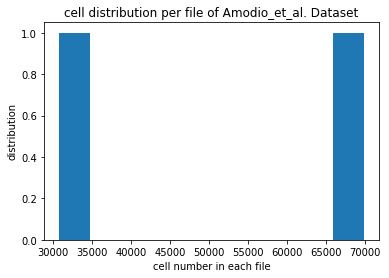

In [69]:
poolinputs_singlefolder(summary_file,input_dir, test = True)

In [19]:
data.head()

,CD27,CD19,CD45RA,TNFa,CD16,CD8a,HLA-DR,CCR4,CD25,MIP-1b,...,IFNb,TCRgd,CCR7,CCR6,CD57,CD86,CD279,Perforin,CD45,ID
0,0.333052,0.158921,1.841689,0.289930,0.065625,0.144036,0.872030,0.461688,0.183635,0.122766,...,29.704479,0.854164,0.649991,0.345809,1.054687,0.719260,0.710151,0.432568,4.558056,sample13
1,0.204077,0.214146,2.943826,0.415726,-0.000090,1.937012,0.702857,0.213606,-0.026066,0.079390,...,16.614246,0.555807,0.536014,0.099063,1.880304,0.572253,0.438108,0.240816,4.201001,sample13
2,0.499900,0.529353,3.894305,0.795198,0.234748,2.572005,0.918802,0.514302,0.217133,0.327082,...,17.905331,1.030175,0.761943,0.325918,2.963348,0.949146,0.611551,0.500313,5.076838,sample13
3,0.843965,0.720875,3.342378,1.004296,0.422187,3.098108,2.157088,0.990272,0.540074,0.615989,...,31.691736,1.641245,1.074316,0.543232,2.313082,1.088800,1.133512,0.768351,5.859250,sample13
4,0.267890,0.163961,1.967488,0.344778,0.020560,1.775598,1.581746,0.439782,0.067731,0.145144,...,31.771799,0.776118,0.554806,0.179575,0.995670,0.568744,0.808176,0.345953,4.382180,sample13


In [20]:
pd.concat([data.head(), data.head()], axis = 0 )

,CD27,CD19,CD45RA,TNFa,CD16,CD8a,HLA-DR,CCR4,CD25,MIP-1b,...,IFNb,TCRgd,CCR7,CCR6,CD57,CD86,CD279,Perforin,CD45,ID
0,0.333052,0.158921,1.841689,0.289930,0.065625,0.144036,0.872030,0.461688,0.183635,0.122766,...,29.704479,0.854164,0.649991,0.345809,1.054687,0.719260,0.710151,0.432568,4.558056,sample13
1,0.204077,0.214146,2.943826,0.415726,-0.000090,1.937012,0.702857,0.213606,-0.026066,0.079390,...,16.614246,0.555807,0.536014,0.099063,1.880304,0.572253,0.438108,0.240816,4.201001,sample13
2,0.499900,0.529353,3.894305,0.795198,0.234748,2.572005,0.918802,0.514302,0.217133,0.327082,...,17.905331,1.030175,0.761943,0.325918,2.963348,0.949146,0.611551,0.500313,5.076838,sample13
3,0.843965,0.720875,3.342378,1.004296,0.422187,3.098108,2.157088,0.990272,0.540074,0.615989,...,31.691736,1.641245,1.074316,0.543232,2.313082,1.088800,1.133512,0.768351,5.859250,sample13
4,0.267890,0.163961,1.967488,0.344778,0.020560,1.775598,1.581746,0.439782,0.067731,0.145144,...,31.771799,0.776118,0.554806,0.179575,0.995670,0.568744,0.808176,0.345953,4.382180,sample13
0,0.333052,0.158921,1.841689,0.289930,0.065625,0.144036,0.872030,0.461688,0.183635,0.122766,...,29.704479,0.854164,0.649991,0.345809,1.054687,0.719260,0.710151,0.432568,4.558056,sample13
1,0.204077,0.214146,2.943826,0.415726,-0.000090,1.937012,0.702857,0.213606,-0.026066,0.079390,...,16.614246,0.555807,0.536014,0.099063,1.880304,0.572253,0.438108,0.240816,4.201001,sample13
2,0.499900,0.529353,3.894305,0.795198,0.234748,2.572005,0.918802,0.514302,0.217133,0.327082,...,17.905331,1.030175,0.761943,0.325918,2.963348,0.949146,0.611551,0.500313,5.076838,sample13
3,0.843965,0.720875,3.342378,1.004296,0.422187,3.098108,2.157088,0.990272,0.540074,0.615989,...,31.691736,1.641245,1.074316,0.543232,2.313082,1.088800,1.133512,0.768351,5.859250,sample13
4,0.267890,0.163961,1.967488,0.344778,0.020560,1.775598,1.581746,0.439782,0.067731,0.145144,...,31.771799,0.776118,0.554806,0.179575,0.995670,0.568744,0.808176,0.345953,4.382180,sample13


In [17]:
df.ID

'sample13'